# Visualize Code Generation Results - Different Temperature Settings

1. 9 small language models (SLMs) were tested on 1 code generation dataset - LBPP.
2. Metric used - Pass@1
3. This notebooks load raw results, normalizes them, visualizes them by dataset, and ranks the models based on their average performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

# PART 1. Load Results and Scale the Four Datasets

In [2]:
model_cols = [
    'phixtral-2x2_8', 'Solar-10.7B', 'Llama-3.1-8B', 'Codegemma-7b-it',
    'deepseek-coder-6.7b', 'OpenCodeInterpreter-DS-6.7B',
    'Artigenz-Coder-DS-6.7B', 'CodeQwen1.5-7B-Chat', 'Nxcode-CQ-7B-orpo',
]
param_cols = ['#', 'dataset', 'prompt', 'cleaning', 'temperature', 'top_p']
print(len(model_cols))

9


In [3]:
# load all data
file = '/Users/andrew/Documents/04_git/code-generation/0_documents/2_docs/indiv_model_results_20250529.xlsx'
sheet_names = [
    'LBPP', 'LBPP_Temp05', 'LBPP_Temp025', 'LBPP_Temp010']
res_raw = dict()
for sheet_name in sheet_names:
    df = pd.read_excel( file, sheet_name=sheet_name )
    res_raw[sheet_name] = df[ param_cols + model_cols ]
print('Datasets:', ', '.join(list(res_raw.keys())))
print(res_raw['LBPP'].shape)
res_raw['LBPP']

Datasets: LBPP, LBPP_Temp05, LBPP_Temp025, LBPP_Temp010
(12, 15)


,#,dataset,prompt,cleaning,temperature,top_p,phixtral-2x2_8,Solar-10.7B,Llama-3.1-8B,Codegemma-7b-it,deepseek-coder-6.7b,OpenCodeInterpreter-DS-6.7B,Artigenz-Coder-DS-6.7B,CodeQwen1.5-7B-Chat,Nxcode-CQ-7B-orpo
0,1,lbpp,basic_prompt,raw,1,1,0.030864,0.018519,0.000000,0.000000,0.000000,0.006173,0.000000,0.000000,0.000000
1,2,lbpp,basic_prompt,partial,1,1,0.172840,0.074074,0.296296,0.185185,0.234568,0.277778,0.296296,0.234568,0.228395
2,3,lbpp,basic_prompt,full,1,1,0.166667,0.117284,0.283951,0.185185,0.234568,0.283951,0.290123,0.234568,0.228395
3,4,lbpp,basic_prompt,full_light,1,1,0.179012,0.117284,0.296296,0.191358,0.234568,0.277778,0.296296,0.234568,0.228395
4,5,lbpp,prompt,raw,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,6,lbpp,prompt,partial,1,1,0.166667,0.074074,0.228395,0.160494,0.222222,0.259259,0.271605,0.240741,0.228395
6,7,lbpp,prompt,full,1,1,0.166667,0.098765,0.185185,0.203704,0.228395,0.246914,0.283951,0.240741,0.234568
7,8,lbpp,prompt,full_light,1,1,0.166667,0.098765,0.228395,0.203704,0.228395,0.259259,0.271605,0.240741,0.228395
8,9,lbpp,full_prompt,raw,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,10,lbpp,full_prompt,partial,1,1,0.148148,0.055556,0.216049,0.172840,0.228395,0.253086,0.277778,0.222222,0.197531


In [4]:
# select 15 SLM model columns and add index for convenience
res_raw_short = dict()

for key in res_raw:
    df = res_raw[key]

    score_cols = [c for c in df.columns if c not in param_cols]
    short_df = df[score_cols].apply(pd.to_numeric, errors='coerce').astype(float)

    # Rebuild MultiIndex
    mi = pd.MultiIndex.from_frame(df[['prompt', 'cleaning']])
    short_df.index = mi
    short_df.index.names = ['prompt', 'cleaning']
    short_df.loc[('max', 'max'), score_cols] = short_df.max(axis=0)

    # Save
    res_raw_short[key] = short_df

print('Datasets:', ', '.join(list(res_raw_short.keys())))
print(res_raw_short['LBPP'].shape)
res_raw_short['LBPP']

Datasets: LBPP, LBPP_Temp05, LBPP_Temp025, LBPP_Temp010
(13, 9)


phixtral-2x2_8  Solar-10.7B  Llama-3.1-8B  \
prompt       cleaning                                                
basic_prompt raw               0.030864     0.018519      0.000000   
             partial           0.172840     0.074074      0.296296   
             full              0.166667     0.117284      0.283951   
             full_light        0.179012     0.117284      0.296296   
prompt       raw               0.000000     0.000000      0.000000   
             partial           0.166667     0.074074      0.228395   
             full              0.166667     0.098765      0.185185   
             full_light        0.166667     0.098765      0.228395   
full_prompt  raw               0.000000     0.000000      0.000000   
             partial           0.148148     0.055556      0.216049   
             full              0.148148     0.098765      0.259259   
             full_light        0.154321     0.098765      0.259259   
max          max               0.179012     0.117284      0.296296   

                         Codegemma-7b-it  deepseek-coder-6.7b  \
prompt       cleaning                                           
basic_prompt raw                0.000000             0.000000   
             partial            0.185185             0.234568   
             full               0.185185             0.234568   
             full_light         0.191358             0.234568   
prompt       raw                0.000000             0.000000   
             partial            0.160494             0.222222   
             full               0.203704             0.228395   
             full_light         0.203704             0.228395   
full_prompt  raw                0.000000             0.000000   
             partial            0.172840             0.228395   
             full               0.222222             0.234568   
             full_light         0.222222             0.234568   
max          max                0.222222             0.234568   

                         OpenCodeInterpreter-DS-6.7B  Artigenz-Coder-DS-6.7B  \
prompt       cleaning                                                          
basic_prompt raw                            0.006173                0.000000   
             partial                        0.277778                0.296296   
             full                           0.283951                0.290123   
             full_light                     0.277778                0.296296   
prompt       raw                            0.000000                0.000000   
             partial                        0.259259                0.271605   
             full                           0.246914                0.283951   
             full_light                     0.259259                0.271605   
full_prompt  raw                            0.000000                0.000000   
             partial                        0.253086                0.277778   
             full                           0.253086                0.265432   
             full_light                     0.253086                0.277778   
max          max                            0.283951                0.296296   

                         CodeQwen1.5-7B-Chat  Nxcode-CQ-7B-orpo  
prompt       cleaning                                            
basic_prompt raw                    0.000000           0.000000  
             partial                0.234568           0.228395  
             full                   0.234568           0.228395  
             full_light             0.234568           0.228395  
prompt       raw                    0.000000           0.000000  
             partial                0.240741           0.228395  
             full                   0.240741           0.234568  
             full_light             0.240741           0.228395  
full_prompt  raw                    0.000000           0.000000  
             partial                0.222222           0.197531  
     

In [6]:
res_raw_short['LBPP_Temp010']

phixtral-2x2_8  Solar-10.7B  Llama-3.1-8B  \
prompt       cleaning                                                
basic_prompt raw               0.024691     0.018519      0.000000   
             partial           0.166667     0.067901      0.271605   
             full              0.160494     0.111111      0.253086   
             full_light        0.172840     0.111111      0.271605   
prompt       raw               0.000000     0.000000      0.000000   
             partial           0.160494     0.104938      0.216049   
             full              0.160494     0.135802      0.166667   
             full_light        0.160494     0.135802      0.222222   
full_prompt  raw               0.006173     0.000000      0.000000   
             partial           0.129630     0.049383      0.271605   
             full              0.135802     0.092593      0.283951   
             full_light        0.141975     0.092593      0.283951   
max          max               0.172840     0.135802      0.283951   

                         Codegemma-7b-it  deepseek-coder-6.7b  \
prompt       cleaning                                           
basic_prompt raw                0.000000             0.000000   
             partial            0.179012             0.259259   
             full               0.172840             0.253086   
             full_light         0.185185             0.259259   
prompt       raw                0.000000             0.000000   
             partial            0.135802             0.228395   
             full               0.179012             0.234568   
             full_light         0.179012             0.234568   
full_prompt  raw                0.000000             0.000000   
             partial            0.179012             0.234568   
             full               0.216049             0.240741   
             full_light         0.216049             0.240741   
max          max                0.216049             0.259259   

                         OpenCodeInterpreter-DS-6.7B  Artigenz-Coder-DS-6.7B  \
prompt       cleaning                                                          
basic_prompt raw                            0.006173                0.000000   
             partial                        0.302469                0.320988   
             full                           0.302469                0.302469   
             full_light                     0.302469                0.320988   
prompt       raw                            0.000000                0.000000   
             partial                        0.265432                0.296296   
             full                           0.259259                0.296296   
             full_light                     0.265432                0.296296   
full_prompt  raw                            0.000000                0.000000   
             partial                        0.253086                0.302469   
             full                           0.259259                0.296296   
             full_light                     0.259259                0.302469   
max          max                            0.302469                0.320988   

                         CodeQwen1.5-7B-Chat  Nxcode-CQ-7B-orpo  
prompt       cleaning                                            
basic_prompt raw                    0.000000           0.000000  
             partial                0.253086           0.209877  
             full                   0.253086           0.209877  
             full_light             0.253086           0.209877  
prompt       raw                    0.000000           0.000000  
             partial                0.246914           0.246914  
             full                   0.246914           0.246914  
             full_light             0.246914           0.246914  
full_prompt  raw                    0.000000           0.000000  
             partial                0.216049           0.203704  
     

In [73]:
res_raw_short['LBPP_Temp025']

phixtral-2x2_8  Llama-3.1-8B  Codegemma-7b-it  \
prompt       cleaning                                                    
basic_prompt raw               0.134146      0.000000         0.000000   
             partial           0.286585      0.493902         0.554878   
             full              0.310976      0.506098         0.554878   
             full_light        0.292683      0.493902         0.634878   
prompt       raw               0.000000      0.000000         0.000000   
             partial           0.554878      0.573171         0.481707   
             full              0.573171      0.713659         0.512195   
             full_light        0.579268      0.713659         0.512195   
full_prompt  raw               0.000000      0.000000         0.000000   
             partial           0.530488      0.554878         0.542683   
             full              0.542683      0.554878         0.542683   
             full_light        0.542683      0.554878         0.542683   
max          max               0.579268      0.713659         0.634878   

                         deepseek-coder-6.7b  OpenCodeInterpreter-DS-6.7B  \
prompt       cleaning                                                       
basic_prompt raw                    0.109756                     0.347561   
             partial                0.707317                     0.713415   
             full                   0.701220                     0.719512   
             full_light             0.707317                     0.713415   
prompt       raw                    0.000000                     0.000000   
             partial                0.786585                     0.731707   
             full                   0.780488                     0.725610   
             full_light             0.817766                     0.731707   
full_prompt  raw                    0.000000                     0.000000   
             partial                0.701220                     0.777805   
             full                   0.701220                     0.737805   
             full_light             0.701220                     0.737805   
max          max                    0.817766                     0.777805   

                         Artigenz-Coder-DS-6.7B  CodeQwen1.5-7B-Chat  \
prompt       cleaning                                                  
basic_prompt raw                       0.445122             0.000000   
             partial                   0.737805             0.817073   
             full                      0.743902             0.823171   
             full_light                0.737805             0.817073   
prompt       raw                       0.140244             0.000000   
             partial                   0.713415             0.792683   
             full                      0.725610             0.829268   
             full_light                0.771807             0.845568   
full_prompt  raw                       0.164634             0.000000   
             partial                   0.701220             0.829268   
             full                      0.695122             0.829268   
             full_light                0.701220             0.829268   
max          max                       0.771807             0.845568   

                         Nxcode-CQ-7B-orpo  mistral_3b  mistral_8B  \
prompt       cleaning                                                
basic_prompt raw                  0.000000    0.000000    0.000000   
             partial              0.829268    0.756098    0.768293   
             full                 0.835366    0.750000    0.762195   
             full_light           0.829968    0.756098    0.768293   
prompt       raw                  0.000000    0.000000    0.000000   
             partial              0.786585    0.128049    0.701220   
             full                 0.823171    0.756098    0.808878   
             full_light           0.823171    0

In [52]:
y1_sorted, y2_sorted, models_sorted

(array([0.56097561, 0.6097561 , 0.69512195, 0.70731707, 0.76829268,
        0.76829268, 0.77439024, 0.80487805, 0.81707317, 0.82926829,
        0.84146341]),
 array([0.57926829, 0.63487805, 0.68292683, 0.71365854, 0.73780488,
        0.74390244, 0.75609756, 0.80487805, 0.81776585, 0.83536585,
        0.84556829]),
 Index(['phixtral-2x2_8', 'Codegemma-7b-it', 'mistral_nemo', 'Llama-3.1-8B',
        'OpenCodeInterpreter-DS-6.7B', 'Artigenz-Coder-DS-6.7B', 'mistral_3b',
        'mistral_8B', 'deepseek-coder-6.7b', 'Nxcode-CQ-7B-orpo',
        'CodeQwen1.5-7B-Chat'],
       dtype='object'))

In [17]:
plt.style.use('ggplot')  # or 'ggplot', seaborn-v0_8, 'fivethirtyeight'

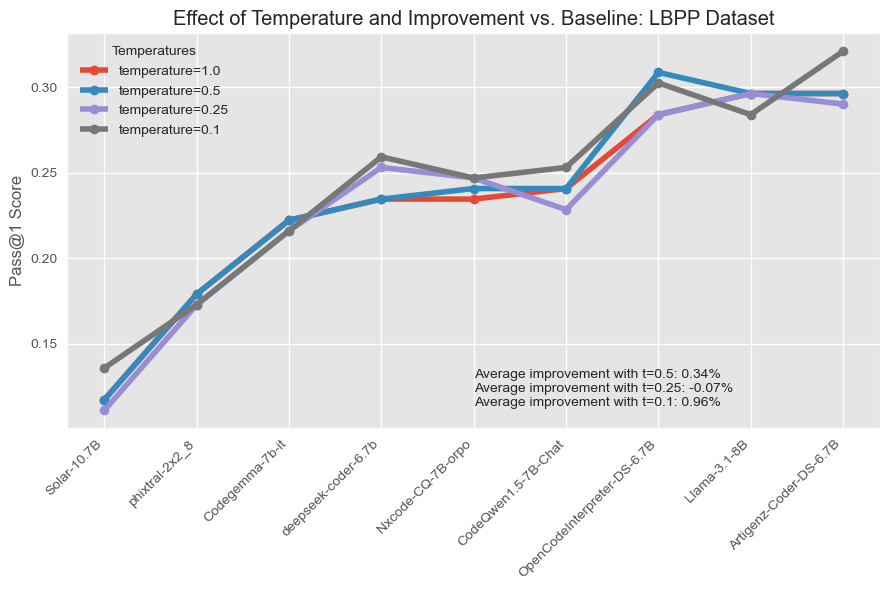

In [20]:
# plot using the max values
baseline = 'LBPP'    #'BigCode'    #'LBPP'    #'HumanEval'
temp050  = 'LBPP_Temp05'
temp025  = 'LBPP_Temp025'
temp010  = 'LBPP_Temp010'

sorted_models = res_raw_short[baseline].columns
y1 = res_raw_short[baseline].loc[('max', 'max')].values
y2 = res_raw_short[temp050].loc[('max', 'max')].values
y3 = res_raw_short[temp025].loc[('max', 'max')].values
y4 = res_raw_short[temp010].loc[('max', 'max')].values

improvement1 = (sum(y2)-sum(y1))/9
improvement2 = (sum(y3)-sum(y1))/9
improvement3 = (sum(y4)-sum(y1))/9
phrase1 = f'Average improvement with t=0.5: {round(improvement1*100, 2)}%'
phrase2 = f'Average improvement with t=0.25: {round(improvement2*100, 2)}%'
phrase3 = f'Average improvement with t=0.1: {round(improvement3*100, 2)}%'
phrase = phrase1 + '\n' + phrase2 + '\n' + phrase3

# sort by y1
sorted_indices = y1.argsort()
y1_sorted = y1[sorted_indices]
y2_sorted = y2[sorted_indices]
y3_sorted = y3[sorted_indices]
y4_sorted = y4[sorted_indices]
models_sorted = sorted_models[sorted_indices]

plt.figure(figsize=(9, 6))
for label, points in [ ('temperature=1.0', y1_sorted), ('temperature=0.5', y2_sorted),
                       ('temperature=0.25', y3_sorted), ('temperature=0.1', y4_sorted), ]:
    plt.plot(range(len(models_sorted)), points, marker='o', label=label)
plt.title(f'Effect of Temperature and Improvement vs. Baseline: {baseline} Dataset')
plt.xticks(range(len(models_sorted)), labels=models_sorted, rotation=45, ha='right')
plt.ylabel('Pass@1 Score')
plt.legend(title='Temperatures')

plt.text(0.5, 0.1, phrase, transform=plt.gca().transAxes,
         fontsize=10, ha='left', va='center',)# fontweight='bold')

plt.tight_layout()
plt.show()

In [76]:
res_raw_short.keys()

dict_keys(['HumanEval', 'BigCode', 'MBPP', 'LBPP', 'HumanEval_Reflection', 'BigCode_Reflection', 'MBPP_Reflection', 'LBPP_Reflection_Temp1'])

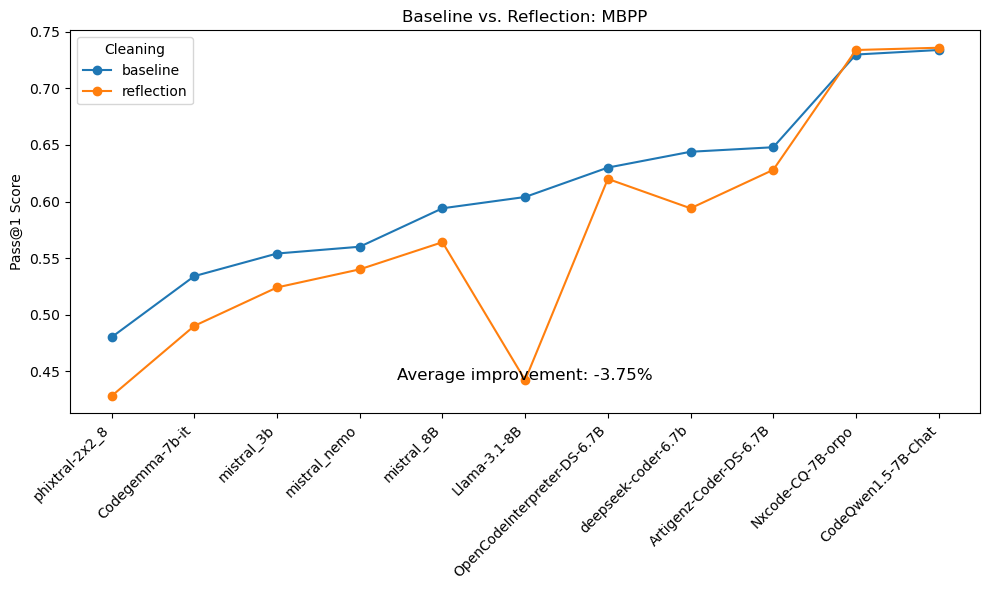

In [62]:
# plot using the most frequent indices
baseline   = 'MBPP'    #'LBPP'    #'HumanEval'
reflection = baseline + '_Reflection'

sorted_models = res_raw_short[baseline].columns
y1 = res_raw_short[baseline].loc[('basic_prompt', 'full')].values
y2 = res_raw_short[reflection].loc[('basic_prompt', 'full_light')].values
improvement = (sum(y2)-sum(y1))/11
phrase = f'Average improvement: {round(improvement*100, 2)}%'

# sort by y1
sorted_indices = y1.argsort()
y1_sorted = y1[sorted_indices]
y2_sorted = y2[sorted_indices]
models_sorted = sorted_models[sorted_indices]

plt.figure(figsize=(10, 6))
for label, points in [('baseline', y1_sorted), ('reflection', y2_sorted)]:
    plt.plot(range(len(models_sorted)), points, marker='o', label=label)
plt.title(f'Baseline vs. Reflection: {baseline}')
plt.xticks(range(len(models_sorted)), labels=models_sorted, rotation=45, ha='right')
plt.ylabel('Pass@1 Score')
plt.legend(title='Cleaning')

plt.text(0.5, 0.1, phrase, transform=plt.gca().transAxes,
         fontsize=12, ha='center', va='center',)# fontweight='bold')

plt.tight_layout()
plt.show()